### 使用scikit-learn实现机器学习分类算法

#### 感知器

In [1]:
%matplotlib inline

from sklearn import datasets
import numpy as np

# iris的数据包含在sklearn模块中
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# 将数据随机分成训练数据和测试数据集，这里按照3：7比例划分。
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
# StandardScaler对数据做标准化处理
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# sklearn实现的感知训练器
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

# 对测试数据进行预测并输出预测错误数量。
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


In [2]:
# 计算感知器在测试数据集上的分类准确率
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))

Accuracy: 0.91


In [3]:
# 绘制训练数据，这个就是上一章的画图程序，然后加上了训练数据集
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Plot class samples
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
        
    # Highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='y', alpha=1.0, linewidths=1, marker='p', s=55, label='test set', edgecolor="none")

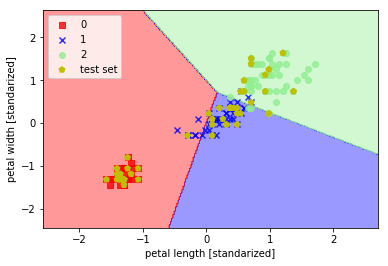

In [4]:
# 将训练数据和测试数据集连接起来
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standarized]')
plt.ylabel('petal width [standarized]')
plt.legend(loc='upper left')
plt.show()
# 通过图形可以看出，我们无法通过一个线性决策边界完美区分三类样本。

### 逻辑回归
激励函数    
\\( z = w^{T}x \\)   
\\( \phi  (z) = \frac{1}{1 + {e}^{-z}}\\)   
   
代价函数    
\\( J(w) = -\sum_{i}^{m} y^{(i)}log(\phi (z^{(i)}))+(1-y^{(i)})log(1-\phi (z^{(i)}) \\)
    


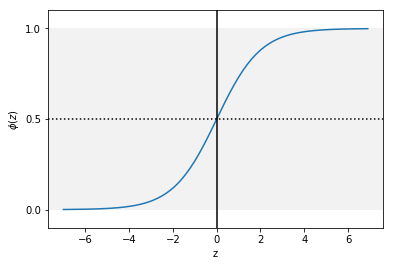

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# sigmoid函数输出范围[0, 1]
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
# x轴0处画一条竖线
plt.axvline(0.0, color='k')
# 添加一个穿越y轴的水平矩形
plt.axhspan(0.0, 1.0, facecolor='0.95', alpha=1.0, ls='dotted')
# 在0.5处画一条虚线
plt.axhline(y=0.5, ls='dotted', color='k')
# y轴刻度只显示下面几个
plt.yticks([0.0, 0.5, 1.0])
# y轴范围
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi(z)$')
plt.show()

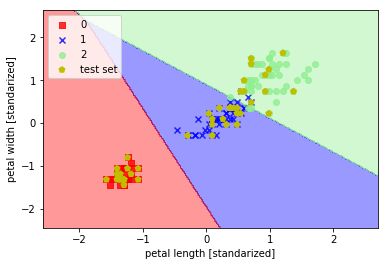

In [6]:
from sklearn.linear_model import LogisticRegression

# 搭建一个逻辑回归，如果需要自己写一个逻辑回归只需要将上一课的激励函数和代价函数改一下
# C正则化参数， C = 1 / λ 
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal length [standarized]')
plt.ylabel('petal width [standarized]')
plt.legend(loc='upper left')
plt.show()

In [7]:
# 检测样本属于某一类别的概率
lr.predict_proba(X_test_std[0, :].reshape(1, -1))

array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

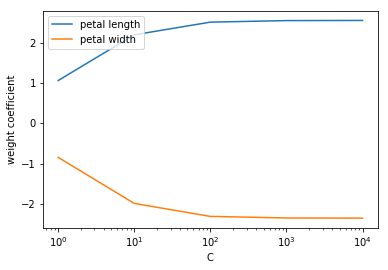

In [8]:
weights, params = [], []
for c in np.arange(0, 5):
    # 添加不同的正则化参数，查看对权重系数的影响
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    # coef_和intercept_ 就是系数矩阵
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)

plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()
# 可以从图形中看出，减少参数C的值，也就是增加正则化的强度，会导致权重系数逐渐收缩。

In [9]:
# 验证coef_和intercept_，缺少正则化参数所以值不一样但是差不多。
print(1 / (1 + np.exp(-(np.dot(X_test_std[0].reshape(1, -1), lr.coef_.T) + lr.intercept_))))
lr.predict_proba(X_test_std[0].reshape(1, -1))

[[  1.41131020e-14   6.71679171e-02   9.99537323e-01]]


array([[  1.32305547e-14,   6.29676452e-02,   9.37032355e-01]])

### SVM（支持向量机）

\\( w_{0} +  w^{T}x ^ {(i)} \geq  1 \\)  若  \\(y ^ {(i)} = 1 \\)     
    
\\( w_{0} +  w^{T}x ^ {(i)} <  1 \\)  若  \\(y ^ {(i)} = -1 \\) 
   
所有的负样本都落在负超平面一侧，所有正样本则在正样本划分出的区域中。   
可以看到比逻辑回归的约束条件更强。


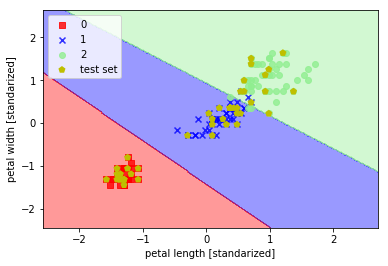

In [10]:
from sklearn.svm import SVC
# C变量是可以适当调整约束条件。
# C值较大时，对应大的错误惩罚。C值较小时，则对错误分类的惩罚没那么严格，可以容忍错误出现。
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standarized]')
plt.ylabel('petal width [standarized]')
plt.legend(loc='upper left')
plt.show()

In [11]:
# 这个是调用liblinear库的分类器。liblinear线性分类器是经过高度优化的，并且支持使用partial_fit方法进行在线学习。
# 下面分别是创建基于随机梯度下降的感知器、逻辑回归、SVM
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

### 使用核SVM解决非线性问题

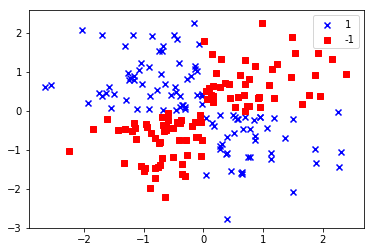

In [12]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1,0], X_xor[y_xor==-1,1], c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

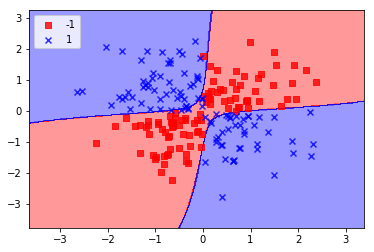

In [13]:
# 使用的比较多的是 径向基函数核（Radial Basis Functaion kernel, RBF kernel）或 高斯核（Gaussian kernel）
# 下面就是使用RBF核来对数据进行分类，gamma是影响决策边界的范围的参数。
# gamma越小将会增加受影响的训练样本的范围，导致决策边界更加宽松。
svm = SVC(kernel='rbf', random_state=0, gamma=0.1, C = 10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

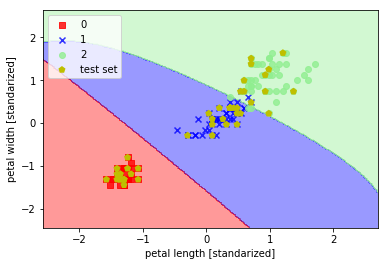

In [14]:
# 使用RBF核来对我们上面的数据分类
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standarized]')
plt.ylabel('petal width [standarized]')
plt.legend(loc='upper left')
plt.show()

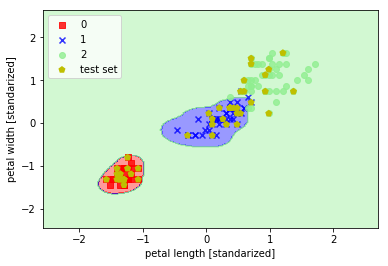

In [15]:
# 对比gamma参数对分类的影响，可以看到类别0和1的边界紧凑了很多。
svm = SVC(kernel='rbf', random_state=0, gamma=20.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standarized]')
plt.ylabel('petal width [standarized]')
plt.legend(loc='upper left')
plt.show()

### 决策树
为了在可获得最大信息增益的特征处进行节点划分，需要定义一个可通过树学习算法进行优化的目标函数。   
在此目标函数能在每次划分时实现对信息增益的最大化。定义如下：   
    
\\( IG(D_{P},f) = I(D_{P})-\sum_{j=1}^{m}\frac{N_{j}}{N_{p}}I(D_{j}) \\)   
   
目前大部分使用的都是二叉决策树，这意味着每个胡节点被划分成了2个子节点。    
   
\\( IG(D_{P},a) = I(D_{P})-\frac{N_{left}}{N_{p}}I(D_{left})-\frac{N_{right}}{N_{p}}I(D_{right}) \\)   
   
目前来说，二叉决策树常用的三个不纯度衡量标准或划分标准分别是：   
   
熵（entropy）   
\\( I_{H}(t) = \sum_{i=1}^{c}p(i|t)log_{2}p(i|t) \\)   
   
基尼系数（Gini index）    
\\( I_{G}(t) = \sum_{i=1}^{c}p(i|t)(-p(i|t)) = 1 - \sum_{i=1}^{c}p(i|t)^{2} \\)   
   
误分类率（classification error）    
\\( I_{E}(t) = 1 - max \left \{ p(i|t) \right \} \\)



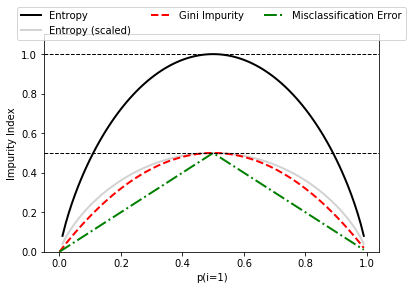

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return p * (1 - (p)) + (1 - p) * (1 - (1 - p))

def entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2((1 - p))

def error(p):
    return 1 - np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i,lab,ls,c in zip([ent, sc_ent, gini(x), err],
                      ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
                     ['-', '-', '--', '-.'],
                      ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5,1.15), ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

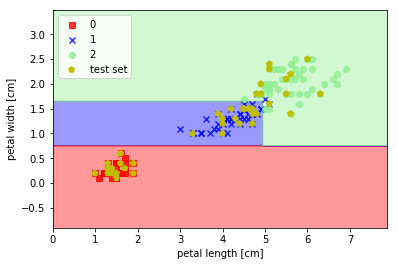

In [17]:
from sklearn.tree import DecisionTreeClassifier
# 使用决策树进行分类，这里构建了一颗最大深度为3的决策树。
# 决策树中对数据进行特征缩放不是必须的。下面的示例就没有进行特征缩放。
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

In [18]:
# 还可以将决策树生成的树导出到文件，然后通过像GraphViz之类的工具查看树。
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', feature_names=['petal length', 'petal width'])

### 随机森林
随机森林可以视为多棵决策树的集成。

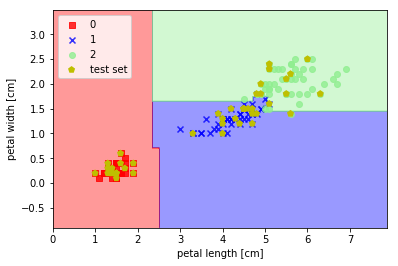

In [19]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators使用10棵决策树来组建随机森林的训练。n_jobs是使用机器的内核数量，这里使用的是2个CPU。
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

### 惰性学习算法--K-近邻算法
KNN算法本身比较简单，可以归纳为以下几点：
1. 选择近邻的数量k和距离度量方法
2. 找到待分类样本的k个最近邻居
3. 根据最近邻的内标进行多数投票

正则化方法并不适用于决策树和KNN等算法。

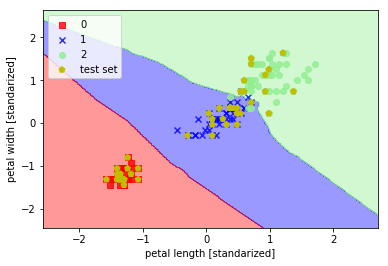

In [20]:
from sklearn.neighbors import KNeighborsClassifier
# n_neighbors选择近邻数量为5个。参数p是选择计算距离的算法。p=2为欧几里得距离，p=1为曼哈顿距离
# minkowski是对上面2种距离的泛化。计算距离需要对数据进行标准化处理。
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [standarized]')
plt.ylabel('petal width [standarized]')
plt.legend(loc='upper left')
plt.show()